In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from plotly.tools import FigureFactory as ff
from plotly.offline import iplot
import nbformat
from scipy.stats import norm
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.pipeline import make_pipeline
import matplotlib.ticker as mticker
import streamlit as st
import dash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc
print(nbformat.__version__)  # Debería ser 4.2.0 o superior


5.10.4


In [6]:

# Ruta al archivo Excel que quieres abrir
excel_1 = 'C:/Users/fperilla/OneDrive - Athletic Sport Inc SAS/Documentos/Análisis RFM/Nueva versión/V1_VENTAS_ENERO-FEBRERO_25.csv'
excel_2 = 'C:/Users/fperilla/OneDrive - Athletic Sport Inc SAS/Documentos/Análisis RFM/Nueva versión/V1_VENTAS_FEBRERO-JUNIO_24.csv'
excel_3 = 'C:/Users/fperilla/OneDrive - Athletic Sport Inc SAS/Documentos/Análisis RFM/Nueva versión/V1_VENTAS_JULIO-DICIEMBRE_24.csv'
# Leer el archivo Excel como un DataFrame


df1 = pd.read_csv(excel_1, encoding='utf-8')
df2 = pd.read_csv(excel_2, encoding='utf-8')
df3 = pd.read_csv(excel_3, encoding='utf-8')


# Consolidar todos los DataFrames en uno solo
df_consolidado = pd.concat([df1, df2, df3], ignore_index=True)


valores_a_excluir = [
    1152703192, 1001315431, 173551123, 1024553111, 1065835506, 1152470233, 
    1020554632, 1037626210, 1281665411, 1332256644, 179928111, 16481443, 
    1033721243, 11727262, 1006117228, 1102857287, 1118578821, 67015113, 
    1067598055, 1093792670, 80858333, 1001971700, 1093773224, 1099634221, 
    1113671815, 1077471475, 8773367, 114272828, 11628227, 1006049776, 
    1143351902, 1007892617, 1233491748, 1085251628, 1194356218, 1194356812, 
    1013104118, 10007314567, 1029283928, 1001015393, 1075674665, 10754632132, 
    2674485743, 55179467, 1193684352, 1194783622, 1076312564, 1194005128, 
    10023145628, 10928283828, 6735829736, 4377552, 4773826, 4528283, 
    44332828, 1076312873, 1053614433, 976553000000, 4377678, 4793737, 
    12136941, 4782838, 4782738, 1007638462, 100516847, 1005168472, 
    1079483649, 10797658769
]

# Convertir 'Creation Date' a formato de fecha antes de cualquier otra operación
df_consolidado['Creation Date'] = pd.to_datetime(df_consolidado['Creation Date'], errors='coerce')

df_consolidado = df_consolidado[~df_consolidado['Client Document'].isin(valores_a_excluir)]

df_consolidado['Client Document'] = df_consolidado['Client Document'].astype(str)

# Agregar la columna 'Day of Week' con el nombre del día correspondiente
df_consolidado['Day of Week'] = df_consolidado['Creation Date'].dt.day_name()

# Convertir 'Creation Date' a formato de fecha
df_consolidado['Creation Date'] = pd.to_datetime(df_consolidado['Creation Date'], errors='coerce')


# Mostrar las primeras filas del DataFrame consolidado
print(df_consolidado.info())


<class 'pandas.core.frame.DataFrame'>
Index: 43230 entries, 0 to 43331
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Creation Date           43230 non-null  datetime64[ns]
 1   DayName                 43230 non-null  object        
 2   City                    43230 non-null  object        
 3   Client Document         43230 non-null  object        
 4   Client Name             43227 non-null  object        
 5   UtmMedium               18922 non-null  object        
 6   UtmSource               18876 non-null  object        
 7   UtmCampaign             18919 non-null  object        
 8   Order                   43230 non-null  object        
 9   BU                      43230 non-null  object        
 10  Gender                  43230 non-null  object        
 11  Clase                   43227 non-null  object        
 12  Categoria               43230 non-null  object     

In [7]:
df_consolidado.head(5)

,Creation Date,DayName,City,Client Document,Client Name,UtmMedium,UtmSource,UtmCampaign,Order,BU,Gender,Clase,Categoria,Familia/Silueta,Suma de Quantity_SKU,Total Ventas Ecommerce,V1 FPR,Day of Week
0,2025-01-01,Wednesday,Medellín,71378668,Felix Johanny,email,newsletter,mailFINAL_marron,1500060617717-01,Footwear Division,HOMBRE (MENS),M,ATHLETIC TRAINING,AM ALPHA TRAINER,1,441134,100 %,Wednesday
1,2025-01-01,Wednesday,Manizales,1053773880,yuliana,cpa,google_search,Perly_Marca_AON,1500130617743-01,Apparel Division,MUJER (WOMENS),F,WOMEN TRAINING,BRA,1,197437,100 %,Wednesday
2,2025-01-01,Wednesday,Cali,66809307,Victoria,cpa,google_search,Perly_Marca_AON,1500150617745-01,Footwear Division,MUJER (WOMENS),F,WOMEN TRAINING,BELLA,1,441134,100 %,Wednesday
3,2025-01-01,Wednesday,Medellín,1017143195,Isabel,cpa,google_search,Perly_Marca_AON,1500160617749-01,Footwear Division,MUJER (WOMENS),F,NIKE SPORTSWEAR,VOMERO,1,886513,100 %,Wednesday
4,2025-01-01,Wednesday,Envigado,1214714695,Carolina,cpa,google_search,Perly_Marca_AON,1500160617751-01,Apparel Division,MUJER (WOMENS),F,WOMEN TRAINING,LONG SLEEVE TOP,1,226849,100 %,Wednesday


#### Qué porcentaje de los clientes representan el 80% de los ingresos?

El 52.96% de los clientes generan el 80% de las ventas.


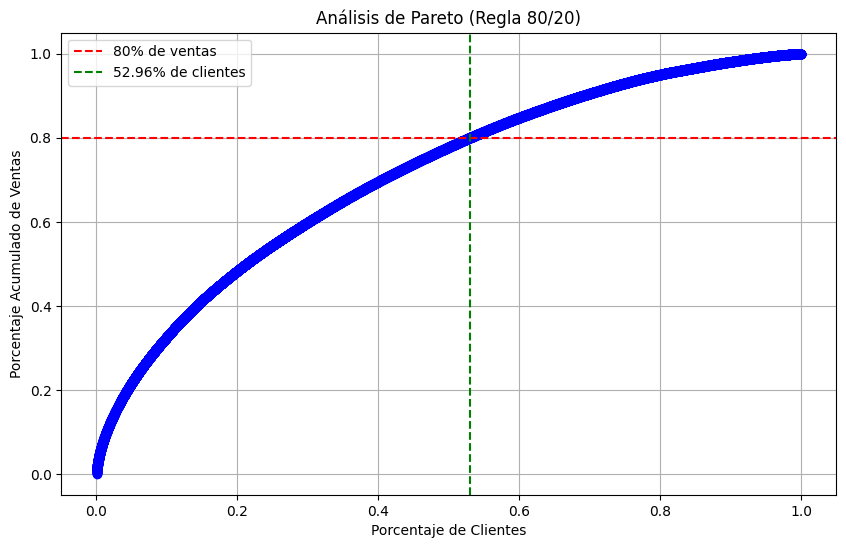

In [8]:

# Agrupar las ventas por cliente
ventas_por_cliente = df_consolidado.groupby("Client Document")["Total Ventas Ecommerce"].sum().reset_index()

# Ordenar por ventas en orden descendente
ventas_por_cliente = ventas_por_cliente.sort_values(by="Total Ventas Ecommerce", ascending=False)

# Calcular el porcentaje acumulado de ventas
ventas_por_cliente["% Acumulado Ventas"] = ventas_por_cliente["Total Ventas Ecommerce"].cumsum() / ventas_por_cliente["Total Ventas Ecommerce"].sum()

# Calcular el porcentaje de clientes acumulado
ventas_por_cliente["% Clientes Acumulado"] = np.arange(1, len(ventas_por_cliente) + 1) / len(ventas_por_cliente)

# Determinar cuántos clientes generan el 80% de las ventas
pareto_cutoff = ventas_por_cliente[ventas_por_cliente["% Acumulado Ventas"] <= 0.80]

# Número de clientes que contribuyen al 80% de las ventas
num_clientes_pareto = len(pareto_cutoff)
total_clientes = len(ventas_por_cliente)
porcentaje_clientes_pareto = num_clientes_pareto / total_clientes * 100

print(f"El {porcentaje_clientes_pareto:.2f}% de los clientes generan el 80% de las ventas.")

# Gráfico de Pareto
plt.figure(figsize=(10,6))
plt.plot(ventas_por_cliente["% Clientes Acumulado"], ventas_por_cliente["% Acumulado Ventas"], marker="o", linestyle="-", color="b")
plt.axhline(y=0.80, color="r", linestyle="--", label="80% de ventas")
plt.axvline(x=porcentaje_clientes_pareto/100, color="g", linestyle="--", label=f"{porcentaje_clientes_pareto:.2f}% de clientes")
plt.xlabel("Porcentaje de Clientes")
plt.ylabel("Porcentaje Acumulado de Ventas")
plt.title("Análisis de Pareto (Regla 80/20)")
plt.legend()
plt.grid(True)
plt.show()

#### Resultado preliminar


1. Nike.com no sigue exactamente la regla clásica 80/20, pero sí muestra una fuerte concentración de ventas en un grupo relativamente pequeño de clientes.

2. Cerca del 53% de los clientes generan el 80% de las ventas, lo que implica que existe una oportunidad para segmentar mejor a los clientes y potenciar la fidelización de los más valiosos.

3. Optimización de estrategias de marketing: Se pueden enfocar esfuerzos en retener y expandir la base de clientes de alto valor.

4. Expansión del mercado: Es posible trabajar en estrategias para aumentar el gasto de los clientes menos rentables y mejorar la conversión.

#### Algunas hipótesis sobre cómo empezar a trabajar con una segmentación de clientes


1. Identificar quiénes son los clientes de mayor valor y diseñar estrategias para aumentar su lealtad.

2. Y qué tal si pensamos en implementar programas de recompensas o membresías para retener clientes de alto valor.Usar datos de compra para personalizar ofertas y promociones a los clientes más rentables.

3. Explorar estrategias para convertir clientes ocasionales en clientes recurrentes.

## RFM

#### Ranking de clientes

In [9]:

df_grouped = df_consolidado.groupby(['Client Document'])['Total Ventas Ecommerce'].sum()

# Ordenar la Series sin el argumento 'by'
grouped_data_sorted = df_grouped.sort_values(ascending=False)

grouped_data_sorted.head(10)

Client Document
900129938     18855694
9735023       15697584
39677251      15075625
80223205      14034597
91508979      13322356
1020760743    12239449
1030570849    11941757
52818161      11485997
1081516017    10858320
52453422      10844305
Name: Total Ventas Ecommerce, dtype: int64

#### Fecha de referencia

In [10]:

df_grouped = df_consolidado.groupby(['Client Document'])['Total Ventas Ecommerce'].sum()

# Análisis de RFM
fecha_referencia = df_consolidado['Creation Date'].max() + pd.DateOffset(days=1)
rfm_data = df_consolidado.groupby('Client Document').agg({
    'Creation Date': lambda x: (fecha_referencia - x.max()).days,  # Recencia
    'Order': 'nunique',  # Frecuencia
    'Total Ventas Ecommerce': 'sum',  # Valor Monetario
        
})
rfm_data.columns = ['Recencia', 'Frecuencia', 'ValorMonetario']

# Unir RFM con df_grouped
#df_final = df_grouped.merge(rfm_data, on='Client Document', how='left')

# Ordenar el DataFrame de mayor a menor por 'ValorMonetario'
rfm_data_sorted = rfm_data.sort_values(by='ValorMonetario', ascending=False)

rfm_data_sorted


,Recencia,Frecuencia,ValorMonetario
Client Document,,,
900129938,46,10,18855694
9735023,1,15,15697584
39677251,19,11,15075625
80223205,14,23,14034597
91508979,61,12,13322356
...,...,...,...
1000833974,359,1,0
1013635357,134,1,0
1030691978,117,1,0


#### Puntuaciones RFM

In [11]:
# Asignar puntuaciones RFM
def rfm_scores_improved(dataframe):
    """
    Asigna puntuaciones RFM a los clientes incluyendo la Frecuencia en el análisis:
    - Recencia_score: 5 - más reciente, 1 - menos reciente
    - Frecuencia_score: 1 - menos frecuente, 5 - más frecuente
    - ValorMonetario_score: 1 - menos valioso, 5 - más valioso
    - RFM_SCORE: Suma de Recencia_score, Frecuencia_score y ValorMonetario_score
    """
    dataframe["R"] = pd.qcut(dataframe["Recencia"], 5, labels=[5, 4, 3, 2, 1])
    dataframe["F"] = pd.qcut(dataframe["Frecuencia"].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
    dataframe["V"] = pd.qcut(dataframe["ValorMonetario"], 5, labels=[1, 2, 3, 4, 5])

    # Sumamos las puntuaciones para obtener un RFM_SCORE mejorado
    dataframe["RFM_SCORE"] = dataframe["R"].astype(str) + dataframe["F"].astype(str) + dataframe["V"].astype(str)

    return dataframe


rfm_scores_improved(rfm_data_sorted).head(5)

,Recencia,Frecuencia,ValorMonetario,R,F,V,RFM_SCORE
Client Document,,,,,,,
900129938,46,10,18855694,5,5,5,555
9735023,1,15,15697584,5,5,5,555
39677251,19,11,15075625,5,5,5,555
80223205,14,23,14034597,5,5,5,555
91508979,61,12,13322356,5,5,5,555


In [12]:
rfm_data_sorted["Recencia"].describe()


count    27091.000000
mean       149.789340
std        100.678636
min          1.000000
25%         79.000000
50%        109.000000
75%        219.000000
max        389.000000
Name: Recencia, dtype: float64

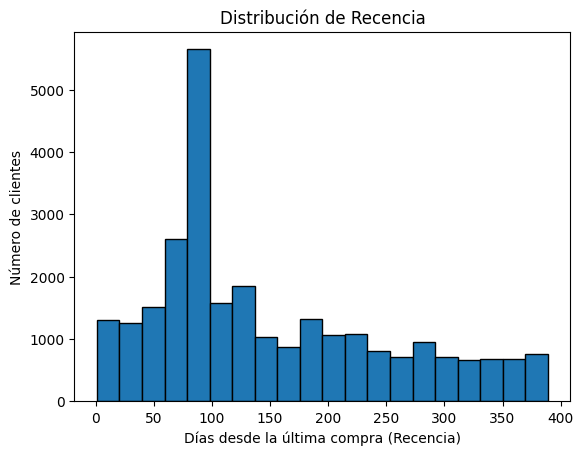

In [13]:
plt.hist(rfm_data_sorted["Recencia"], bins=20, edgecolor="black")
plt.xlabel("Días desde la última compra (Recencia)")
plt.ylabel("Número de clientes")
plt.title("Distribución de Recencia")
plt.show()

In [14]:
rfm_data_sorted["Frecuencia"].describe()

count    27091.000000
mean         1.257466
std          0.823590
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         32.000000
Name: Frecuencia, dtype: float64

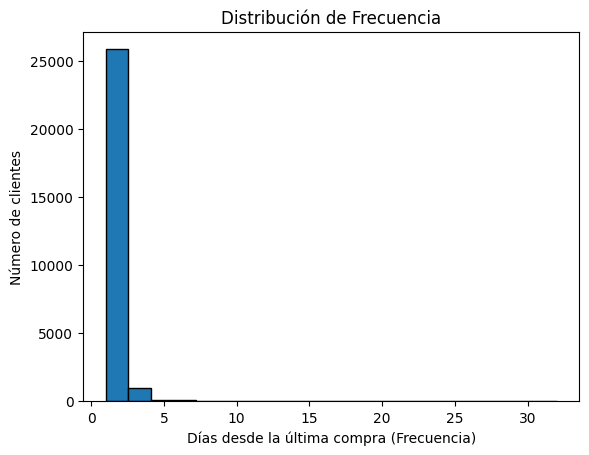

In [15]:
plt.hist(rfm_data_sorted["Frecuencia"], bins=20, edgecolor="black")
plt.xlabel("Días desde la última compra (Frecuencia)")
plt.ylabel("Número de clientes")
plt.title("Distribución de Frecuencia")
plt.show()

In [16]:
desc = rfm_data_sorted["ValorMonetario"].describe()
desc.apply(lambda x: f"{x:,.2f}")


count        27,091.00
mean        578,020.05
std         630,639.47
min               0.00
25%         264,664.00
50%         441,134.00
75%         659,622.00
max      18,855,694.00
Name: ValorMonetario, dtype: object

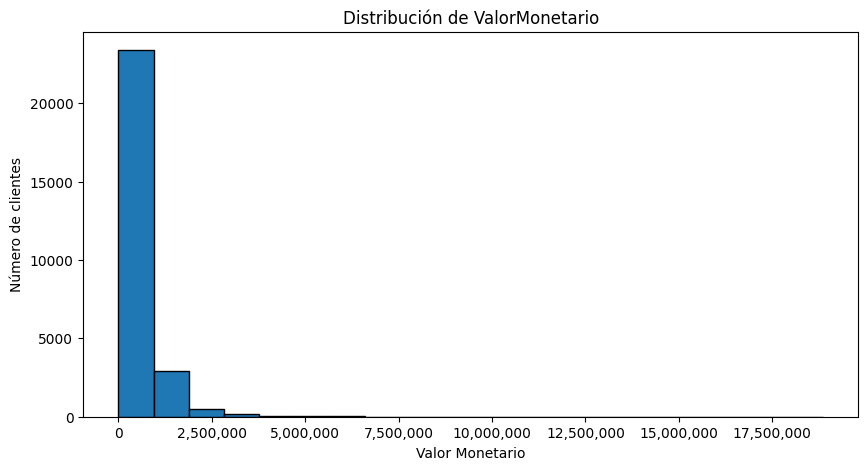

In [17]:
plt.figure(figsize=(10, 5))  # Ajustar el tamaño de la figura
plt.hist(rfm_data_sorted["ValorMonetario"], bins=20, edgecolor="black")

plt.xlabel("Valor Monetario")  
plt.ylabel("Número de clientes")
plt.title("Distribución de ValorMonetario")

# Formatear el eje X para evitar notación científica
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Formato con separadores de miles

plt.show()


#### Segmentos

In [18]:
# Definir el mapa de segmentos basado en la tabla
mapa_segmentos = {
    "555": "Campeones", "554": "Campeones", "544": "Campeones", "545": "Campeones",
    "454": "Campeones", "455": "Campeones", "445": "Campeones",

    "543": "Leales", "444": "Leales", "435": "Leales", "355": "Leales",
    "354": "Leales", "345": "Leales", "344": "Leales", "335": "Leales",

    "553": "Potenciales_leales", "551": "Potenciales_leales", "552": "Potenciales_leales",
    "541": "Potenciales_leales", "542": "Potenciales_leales", "533": "Potenciales_leales",
    "532": "Potenciales_leales", "531": "Potenciales_leales", "452": "Potenciales_leales",
    "451": "Potenciales_leales", "442": "Potenciales_leales", "441": "Potenciales_leales",
    "431": "Potenciales_leales", "453": "Potenciales_leales", "433": "Potenciales_leales",
    "432": "Potenciales_leales", "423": "Potenciales_leales", "353": "Potenciales_leales",
    "352": "Potenciales_leales", "351": "Potenciales_leales", "342": "Potenciales_leales",
    "341": "Potenciales_leales", "333": "Potenciales_leales", "323": "Potenciales_leales",

    "512": "Nuevo Clientes", "511": "Nuevo Clientes", "422": "Nuevo Clientes",
    "421": "Nuevo Clientes", "412": "Nuevo Clientes", "411": "Nuevo Clientes", "311": "Nuevo Clientes",

    "525": "Prometedores", "524": "Prometedores", "523": "Prometedores", "522": "Prometedores",
    "521": "Prometedores", "515": "Prometedores", "514": "Prometedores", "513": "Prometedores",
    "425": "Prometedores", "424": "Prometedores", "413": "Prometedores", "414": "Prometedores",
    "415": "Prometedores", "315": "Prometedores", "314": "Prometedores", "313": "Prometedores",

    "535": "Necesitan Atención", "534": "Necesitan Atención", "443": "Necesitan Atención",
    "434": "Necesitan Atención", "343": "Necesitan Atención", "334": "Necesitan Atención",
    "325": "Necesitan Atención", "324": "Necesitan Atención",

    "331": "Casi Dormidos", "321": "Casi Dormidos", "312": "Casi Dormidos",
    "221": "Casi Dormidos", "213": "Casi Dormidos", "231": "Casi Dormidos",
    "241": "Casi Dormidos", "251": "Casi Dormidos",

    "255": "En Riesgo", "254": "En Riesgo", "245": "En Riesgo",
    "244": "En Riesgo", "253": "En Riesgo", "252": "En Riesgo",
    "243": "En Riesgo", "242": "En Riesgo", "235": "En Riesgo",
    "234": "En Riesgo", "225": "En Riesgo", "224": "En Riesgo",
    "153": "En Riesgo", "152": "En Riesgo", "145": "En Riesgo",
    "143": "En Riesgo", "142": "En Riesgo", "135": "En Riesgo",
    "134": "En Riesgo", "133": "En Riesgo", "125": "En Riesgo", "124": "En Riesgo",

    "155": "No se pueden perder", "154": "No se pueden perder",
    "144": "No se pueden perder", "214": "No se pueden perder",
    "215": "No se pueden perder", "115": "No se pueden perder",
    "114": "No se pueden perder", "113": "No se pueden perder",

    "332": "Hibernando", "322": "Hibernando", "233": "Hibernando",
    "232": "Hibernando", "223": "Hibernando", "222": "Hibernando",
    "132": "Hibernando", "123": "Hibernando", "122": "Hibernando",
    "212": "Hibernando", "211": "Hibernando",

    "111": "Perdidos", "112": "Perdidos", "121": "Perdidos",
    "131": "Perdidos", "141": "Perdidos", "151": "Perdidos"
}

rfm_data_sorted['Segmento'] = rfm_data_sorted['RFM_SCORE'].replace(mapa_segmentos, regex = True)
rfm_data_sorted.head(5)

,Recencia,Frecuencia,ValorMonetario,R,F,V,RFM_SCORE,Segmento
Client Document,,,,,,,,
900129938,46,10,18855694,5,5,5,555,Campeones
9735023,1,15,15697584,5,5,5,555,Campeones
39677251,19,11,15075625,5,5,5,555,Campeones
80223205,14,23,14034597,5,5,5,555,Campeones
91508979,61,12,13322356,5,5,5,555,Campeones


#### Distribución de los segmentos

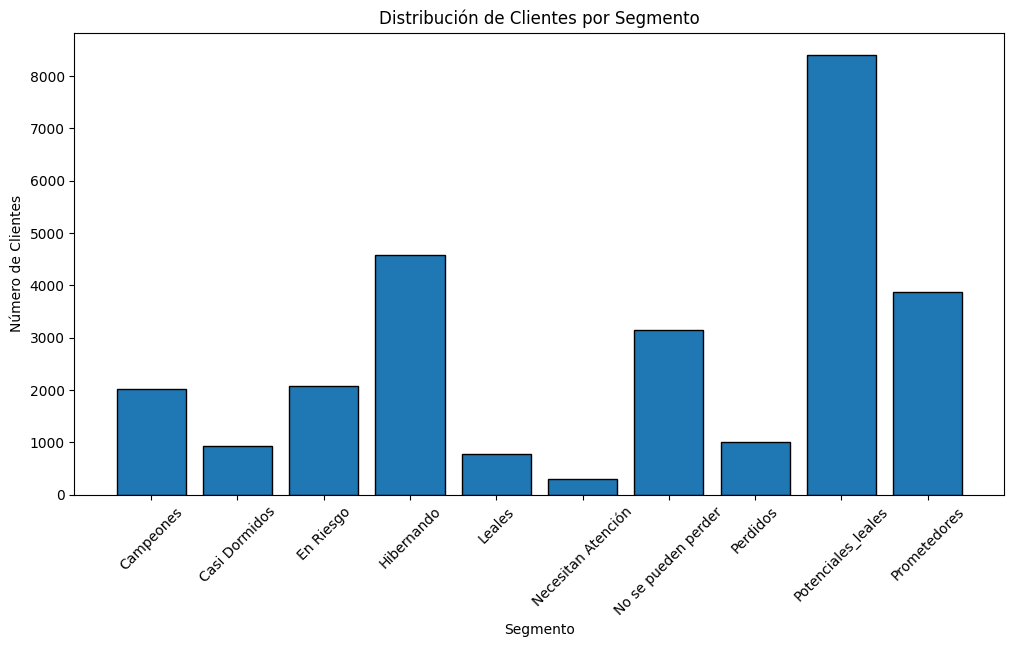

In [19]:
rfm_data_sorted = rfm_data_sorted.reset_index()

# Contar la cantidad de clientes por segmento
segment_counts = rfm_data_sorted.groupby("Segmento")["Client Document"].count()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(segment_counts.index, segment_counts.values, edgecolor="black")

# Etiquetas y título
plt.xlabel("Segmento")
plt.ylabel("Número de Clientes")
plt.title("Distribución de Clientes por Segmento")
plt.xticks(rotation=45)  # Rotar etiquetas si son largas

# Mostrar el gráfico
plt.show()

In [20]:
segment_counts

Segmento
Campeones              2025
Casi Dormidos           922
En Riesgo              2069
Hibernando             4571
Leales                  785
Necesitan Atención      298
No se pueden perder    3149
Perdidos                998
Potenciales_leales     8407
Prometedores           3867
Name: Client Document, dtype: int64

#### Relación entre variables

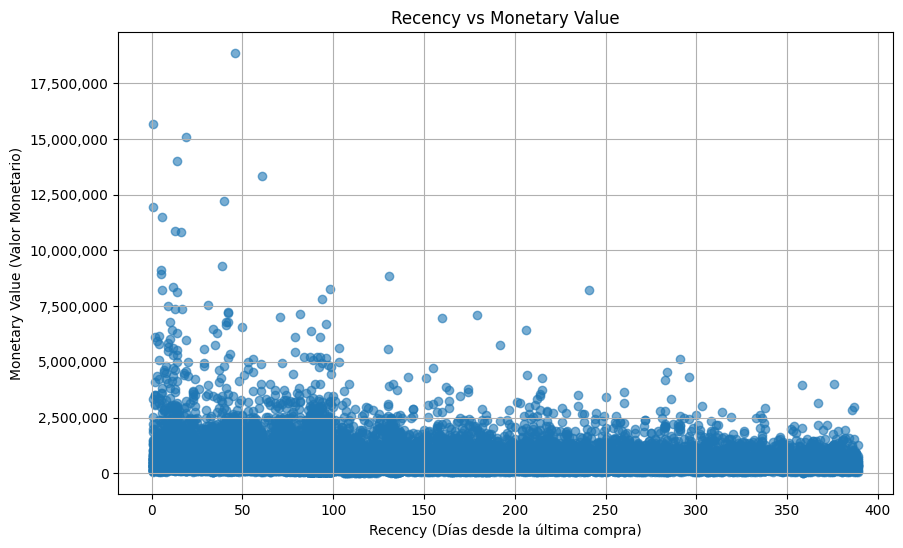

In [21]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(rfm_data_sorted["Recencia"], rfm_data_sorted["ValorMonetario"], alpha=0.6)

# Etiquetas y título
plt.xlabel("Recency (Días desde la última compra)")
plt.ylabel("Monetary Value (Valor Monetario)")
plt.title("Recency vs Monetary Value")

# Formatear el eje X para evitar notación científica y agregar separadores de miles
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # Eje X
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))  # Eje Y

# Mostrar la cuadrícula para mejor visualización
plt.grid(True)

# Mostrar el gráfico
plt.show()


#### Ejes del gráfico:
- Eje X (Recency - Días desde la última compra):

  * Un valor bajo indica que el cliente ha comprado recientemente.
  * Un valor alto indica que el cliente no ha comprado en mucho tiempo.


- Eje Y (Monetary Value - Valor Monetario de la Compra):

  * Representa cuánto ha gastado un cliente en total.
  * Valores más altos significan clientes de alto valor.






#### Clientes con alta recency y bajo valor monetario
  * En la parte derecha e inferior del gráfico hay clientes con recency alta y valores de compra bajos. Esto indica clientes inactivos con poco gasto, que podrían haber sido compradores esporádicos o simplemente no encontraron valor suficiente para volver.

#### Concentración de clientes con compras recientes y bajo valor monetario
  * La mayoría de los puntos están en la parte inferior izquierda del gráfico (valores bajos de recency y monetary value).Esto sugiere que hemos adquirido muchos clientes nuevos, pero la mayoría de ellos no han gastado cantidades significativas. La temporalidad de navidad puede explicar mucho ese fenómeno.

#### Clientes de alto valor con compras recientes
  * Hay varios clientes con valores de compra muy altos (más de 10 millones) y baja recency (~0-50 días). Estos clientes son altamente valiosos y activos, lo que indica un segmento premium que podría ser fidelizado con estrategias específicas.

C:\Users\fperilla\AppData\Local\Temp\ipykernel_24872\177504244.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




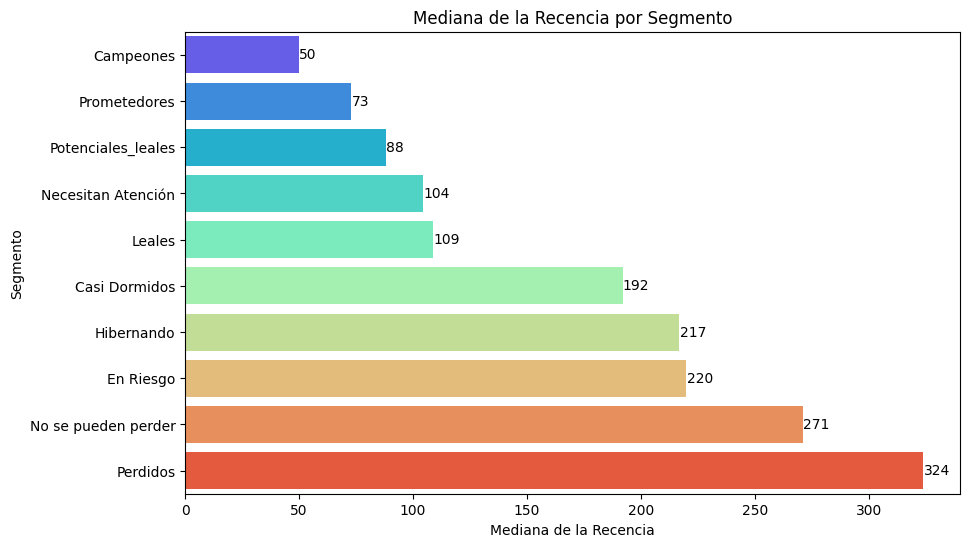

In [22]:

# Calcular la mediana de Recencia por Segmento y ordenarla
median_frequency_by_segment = rfm_data_sorted.groupby("Segmento")["Recencia"].median().sort_values()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=median_frequency_by_segment.values, y=median_frequency_by_segment.index, palette="rainbow")

# Etiquetas y título
plt.xlabel("Mediana de la Recencia")
plt.ylabel("Segmento")
plt.title("Mediana de la Recencia por Segmento")

# Agregar etiquetas en cada barra
for index, value in enumerate(median_frequency_by_segment.values):
    ax.text(value + 0.1, index, f'{value:,.0f}', va='center', fontsize=10)  # Ajuste de posición y formato

# Formatear el eje X para evitar notación científica y agregar separadores de miles
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Mostrar el gráfico
plt.show()



#### Resumen

Este gráfico muestra cómo se agrupan los clientes de Nike.com según el número de días que han pasado desde su última compra (recencia). La "mediana" indica el punto medio en cada segmento, ayudándonos a entender qué tan activos o inactivos están nuestros clientes.

C:\Users\fperilla\AppData\Local\Temp\ipykernel_24872\2607349718.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




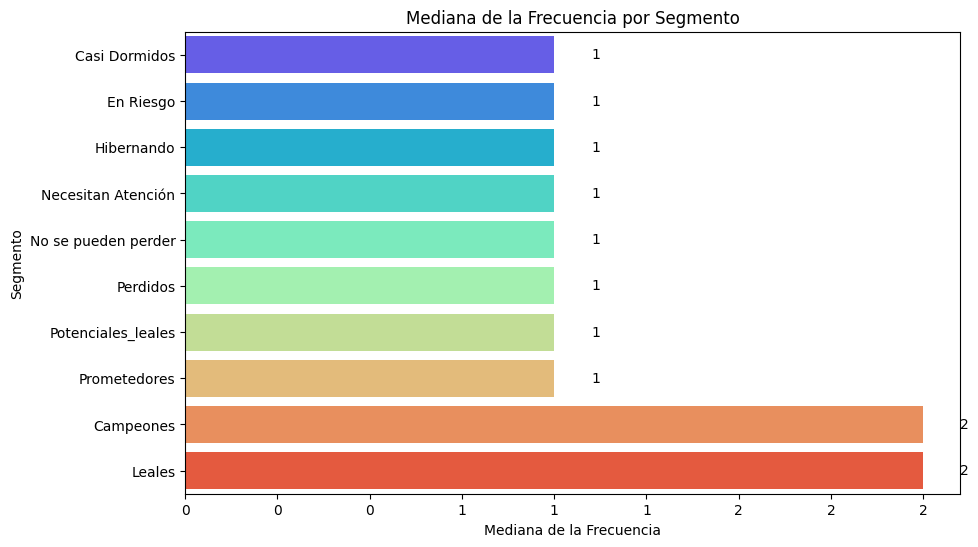

In [23]:
# Calcular la mediana de Frecuencia por Segmento y ordenarla
median_frequency_by_segment = rfm_data_sorted.groupby("Segmento")["Frecuencia"].median().sort_values()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=median_frequency_by_segment.values, y=median_frequency_by_segment.index, palette="rainbow")

# Etiquetas y título
plt.xlabel("Mediana de la Frecuencia")
plt.ylabel("Segmento")
plt.title("Mediana de la Frecuencia por Segmento")

# Agregar etiquetas en cada barra
for index, value in enumerate(median_frequency_by_segment.values):
    ax.text(value + 0.1, index, f'{value:,.0f}', va='center', fontsize=10)  # Ajuste de posición y formato

# Formatear el eje X para evitar notación científica y agregar separadores de miles
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Mostrar el gráfico
plt.show()


C:\Users\fperilla\AppData\Local\Temp\ipykernel_24872\1388384274.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




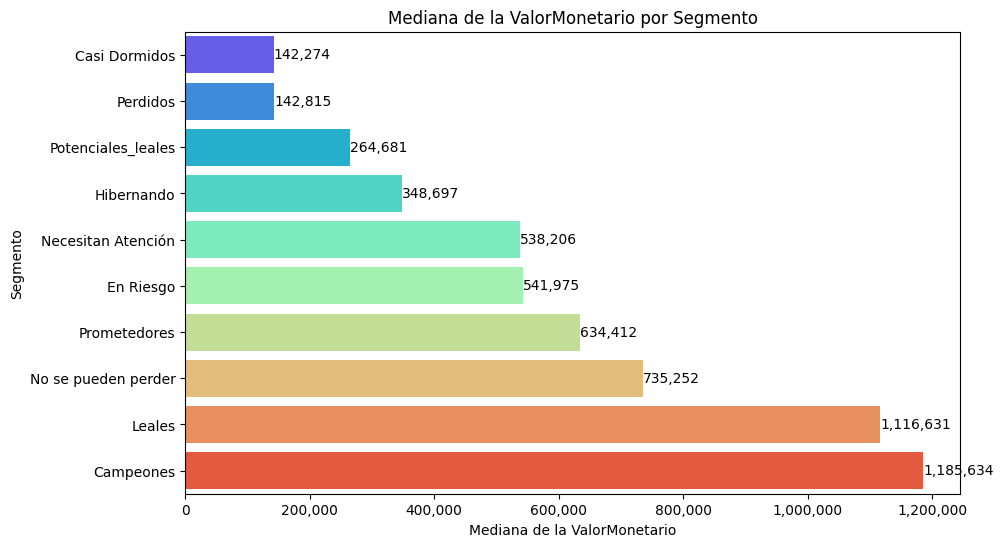

In [24]:
# Calcular la mediana de ValorMonetario por Segmento y ordenarla
median_frequency_by_segment = rfm_data_sorted.groupby("Segmento")["ValorMonetario"].median().sort_values()

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=median_frequency_by_segment.values, y=median_frequency_by_segment.index, palette="rainbow")

# Etiquetas y título
plt.xlabel("Mediana de la ValorMonetario")
plt.ylabel("Segmento")
plt.title("Mediana de la ValorMonetario por Segmento")

# Agregar etiquetas en cada barra
for index, value in enumerate(median_frequency_by_segment.values):
    ax.text(value + 0.1, index, f'{value:,.0f}', va='center', fontsize=10)  # Ajuste de posición y formato

# Formatear el eje X para evitar notación científica y agregar separadores de miles
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Mostrar el gráfico
plt.show()

## Tablero de segmentación

####

In [25]:
df_dashboard = rfm_data_sorted.merge(df_consolidado, on="Client Document", how="left")
df_dashboard

,Client Document,Recencia,Frecuencia,ValorMonetario,R,F,V,RFM_SCORE,Segmento,Creation Date,...,Order,BU,Gender,Clase,Categoria,Familia/Silueta,Suma de Quantity_SKU,Total Ventas Ecommerce,V1 FPR,Day of Week
0,900129938,46,10,18855694,5,5,5,555,Campeones,2025-01-14,...,1503400621031-01,Footwear Division,HOMBRE (MENS),Desconocido,NIKE SPORTSWEAR,AM PLUS,1,554384,65 %,Tuesday
1,900129938,46,10,18855694,5,5,5,555,Campeones,2025-01-14,...,1503400621031-01,Footwear Division,JORDAN BRAND,Desconocido,JORDAN BRAND,AJ 3,1,1088193,100 %,Tuesday
2,900129938,46,10,18855694,5,5,5,555,Campeones,2025-01-14,...,1503400621033-01,Footwear Division,JORDAN BRAND,Desconocido,JORDAN BRAND,AJ 3,1,1088193,100 %,Tuesday
3,900129938,46,10,18855694,5,5,5,555,Campeones,2024-06-01,...,1436700532885-01,Footwear Division,HOMBRE (MENS),Desconocido,NIKE SPORTSWEAR,AM DN,1,785672,100 %,Saturday
4,900129938,46,10,18855694,5,5,5,555,Campeones,2024-07-11,...,1446270542032-01,Apparel Division,JORDAN BRAND,Desconocido,JORDAN BRAND,JACKET,1,463832,80 %,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43225,1013635357,134,1,0,3,5,1,351,Potenciales_leales,2024-10-18,...,1470020572676-01,Apparel Division,JORDAN BRAND,M,JORDAN BRAND,ADJUSTABLE CAP,1,0,0 %,Friday
43226,1030691978,117,1,0,3,5,1,351,Potenciales_leales,2024-11-04,...,1474100578898-01,Equipment Division,HOMBRE (MENS),M,FOOTBALL/SOCCER,ROUND BALL,1,0,0 %,Monday
43227,1073709283,134,1,0,3,5,1,351,Potenciales_leales,2024-10-18,...,1470100573136-01,Equipment Division,HOMBRE (MENS),M,FOOTBALL/SOCCER,KNEE HIGH SOCK,1,0,0 %,Friday
43228,1073709283,134,1,0,3,5,1,351,Potenciales_leales,2024-10-18,...,1470100573136-01,Equipment Division,NIÑOS (KIDS),M,ATHLETIC TRAINING,NO SHOW SOCK,1,0,0 %,Friday


In [ ]:


app = dash.Dash(
    __name__,
    external_stylesheets=[dbc.themes.BOOTSTRAP]
)

# Preparar opciones de dropdown para Segmento
segmentos_unicos = df_dashboard['Segmento'].unique()
segment_options = [{'label': 'All', 'value': 'All'}] + [
    {'label': seg, 'value': seg} for seg in segmentos_unicos
]

# Preparar opciones de dropdown para Gender
gender_unicos = df_dashboard['Gender'].unique()
gender_options = [{'label': 'All', 'value': 'All'}] + [
    {'label': gender, 'value': gender} for gender in gender_unicos
]

app.layout = dbc.Container(
    fluid=True,
    children=[
        dbc.Row(
            dbc.Col(
                html.H1("Dashboard Interactivo - Ventas Ecommerce", 
                        className="text-center my-4"),
                width=12
            )
        ),
        
        dbc.Row(
            [
                dbc.Col(
                    [
                        html.Label("Selecciona un Segmento:", className="fw-bold"),
                        dcc.Dropdown(
                            id='segmento-dropdown',
                            options=segment_options,
                            value='All',  # Valor inicial en 'All'
                            clearable=False,
                            style={'width': '100%'}
                        ),
                    ],
                    width=3
                ),
                dbc.Col(
                    [
                        html.Label("Selecciona un Gender:", className="fw-bold"),
                        dcc.Dropdown(
                            id='gender-dropdown',
                            options=gender_options,
                            value='All',  # Valor inicial en 'All'
                            clearable=False,
                            style={'width': '100%'}
                        ),
                    ],
                    width=3
                ),
            ],
            className="mb-4"
        ),

        dbc.Row(
            [
                dbc.Col(dcc.Graph(id='top-3-uf-chart'), width=6),
                dbc.Col(dcc.Graph(id='ventas-por-gender-chart'), width=6),
            ],
            className="mb-4"
        ),
        dbc.Row(
            [
                dbc.Col(dcc.Graph(id='top-4-categorias-chart'), width=6),
                dbc.Col(dcc.Graph(id='top-5-familia-chart'), width=6),
            ],
            className="mb-4"
        ),
    ]
)

@app.callback(
    [
        Output('top-3-uf-chart', 'figure'),
        Output('ventas-por-gender-chart', 'figure'),
        Output('top-4-categorias-chart', 'figure'),
        Output('top-5-familia-chart', 'figure')
    ],
    [
        Input('segmento-dropdown', 'value'),
        Input('gender-dropdown', 'value')
    ]
)
def actualizar_dashboard(segmento_seleccionado, gender_seleccionado):
    """
    Esta función se ejecuta cada vez que cambia el valor de cualquiera de los dos dropdowns.
    """
    # Iniciamos con el DataFrame completo
    df_filtrado = df_dashboard.copy()

    # Filtramos por Segmento (si no es 'All')
    if segmento_seleccionado != 'All':
        df_filtrado = df_filtrado[df_filtrado['Segmento'] == segmento_seleccionado]

    # Filtramos por Gender (si no es 'All')
    if gender_seleccionado != 'All':
        df_filtrado = df_filtrado[df_filtrado['Gender'] == gender_seleccionado]

    # 1. TOP 3 Regiones (UF) por Total Ventas
    top_3_uf = (
        df_filtrado
        .groupby('UF')['Total Ventas Ecommerce']
        .sum()
        .nlargest(3)
        .reset_index()
    )
    fig_top_3_uf = px.bar(
        top_3_uf, 
        x='UF', 
        y='Total Ventas Ecommerce',
        color='UF',  # Asignar un color diferente por UF
        color_discrete_sequence=px.colors.qualitative.Vivid,
        title='TOP 3 Regiones (UF) por Total Ventas'
    )
    fig_top_3_uf.update_layout(template='plotly_dark')

    # 2. Distribución Porcentual de Total Ventas por Gender
    if not df_filtrado.empty:
        ventas_por_gender = df_filtrado.groupby('Gender')['Total Ventas Ecommerce'].sum()
        ventas_por_gender_pct = (ventas_por_gender / ventas_por_gender.sum() * 100).reset_index()
        ventas_por_gender_pct.columns = ['Gender', 'Porcentaje Ventas']
    else:
        # Si el df_filtrado está vacío, crear un DataFrame vacío para evitar error
        ventas_por_gender_pct = px.data.tips().head(0)  # DataFrame vacío

    fig_ventas_por_gender = px.pie(
        ventas_por_gender_pct,
        names='Gender',
        values='Porcentaje Ventas',
        title='Distribución Porcentual de Ventas por Gender',
        color_discrete_sequence=px.colors.qualitative.Vivid
    )
    fig_ventas_por_gender.update_layout(template='plotly_dark')

    # 3. TOP 4 Categorías por Total Ventas
    top_4_categoria = (
        df_filtrado
        .groupby('Categoria')['Total Ventas Ecommerce']
        .sum()
        .nlargest(4)
        .reset_index()
    )
    fig_top_4_categorias = px.bar(
        top_4_categoria,
        x='Categoria',
        y='Total Ventas Ecommerce',
        color='Categoria',
        color_discrete_sequence=px.colors.qualitative.Vivid,
        title='TOP 4 Categorías por Total Ventas'
    )
    fig_top_4_categorias.update_layout(template='plotly_dark')

    # 4. TOP 5 Familia/Silueta por Total Ventas
    top_5_familia = (
        df_filtrado
        .groupby('Familia/Silueta')['Total Ventas Ecommerce']
        .sum()
        .nlargest(5)
        .reset_index()
    )
    fig_top_5_familia = px.bar(
        top_5_familia,
        x='Familia/Silueta',
        y='Total Ventas Ecommerce',
        color='Familia/Silueta',
        color_discrete_sequence=px.colors.qualitative.Vivid,
        title='TOP 5 Familia/Silueta por Total Ventas'
    )
    fig_top_5_familia.update_layout(template='plotly_dark')

    return fig_top_3_uf, fig_ventas_por_gender, fig_top_4_categorias, fig_top_5_familia

if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
Cell In[27], line 108, in actualizar_dashboard(
    segmento_seleccionado='All',
    gender_seleccionado='All'
)
    103     df_filtrado = df_filtrado[df_filtrado['Gender'] == gender_seleccionado]
    105 # 1. TOP 3 Regiones (UF) por Total Ventas
    106 top_3_uf = (
    107     df_filtrado
--> 108     .groupby('UF')['Total Ventas Ecommerce']
        df_filtrado =       Client Document  Recencia  Frecuencia  ValorMonetario  R  F  V  \
0           900129938        46          10        18855694  5  5  5   
1           900129938        46          10        18855694  5  5  5   
2           900129938        46          10        18855694  5  5  5   
3           900129938        46          10        18855694  5  5  5   
4           900129938        46          10        18855694  5  5  5   
...               ...       ...         ...      

## Algunas conclusiones

#### 1. Segmento Campeones

* Liderado principalmente por el departamento de Antioquia. Esto indica una fuerte presencia de clientes fidelizados en esa región.

* Amplia distribución en géneros distintos a Hombre. Presenta oportunidades de crecimiento y diversificación en audiencias femeninas y otras.

* Productos destacados en Hombre:
   * AF1, Pegasus y ATL NAC.

* Productos destacados en Mujer:
   * AF1, V2K, Pegasus y Free Metcon.

#### 2.	Perdidos – Casi dormidos

* Predominio de accesorios frente a calzado o ropa. Estos clientes se inclinan más por artículos complementarios (gorras, maletines, etc.).

* 65% hombres


#### 3. Hibernando

* Productos Hombre: Mezcla de sportswear y artículos de fútbol, resaltando versatilidad en estilos. Destacan:
   * Short Sleeve Top, Mercurial Superfly, Blazer, Waffle

* Productos Mujer: Predomina sportswear con menor enfoque en deporte de alto rendimiento. Destacan:
   * Blazer, Waffle, Cortez.


#### 3. Hibernando

* Productos Hombre: Mezcla de sportswear y artículos de fútbol, resaltando versatilidad en estilos. Destacan:
   * Short Sleeve Top, Mercurial Superfly, Blazer, Waffle

* Productos Mujer: Predomina sportswear con menor enfoque en deporte de alto rendimiento. Destacan:
   * Blazer, Waffle, Cortez.



#### 4. Prometedores

* Foco en lanzamientos recientes. Muchos clientes adquirieron el lanzamiento “Black Toe”, reflejando sensibilidad a novedades y ediciones especiales.

* Productos hombre.
   * AF1, Pegasus, Dunk, Vomero

* Productos Mujer: Conjunto muy similar al segmento Campeones, sugiere potencial de evolucionar hacia clientes fieles con las estrategias adecuadas

#### 5. No se pueden dejar perder

* Distribución muy equilibrada entre productos para Hombre, Mujer y la línea Jordan, reflejando un alto valor estratégico.

* Productos Jordan destacados
   * AJ3 (asociado con lanzamientos de Balvin y alta inversión), AJ1.

* Productos Hombre
   * AF1, AM90.

* Productos Mujer
   * Free Metcon, AF1.
